In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

c:\Users\user\Downloads\Program_project_py\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1


In [3]:
import os
for file in os.listdir(path):
    print(file)
    dataset = pd.read_csv(os.path.join(path, file))
    
dataset.head()

avocado_ripeness_dataset.csv


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [4]:
# '''
# 堅固性-抗滲透性
# 色調┐
# 飽和┤─外觀
# 亮度」
# 顏色類別
#       ├ 深綠色 → 未熟
#       ├ 綠色
#       ├ 紫色 → 中熟
#       └ 黑色 → 過熟
# 聲音(db)(麥克風-敲擊測試)
# 尺寸(cm3)
# 成熟階段
# '''

In [5]:
dataset.isnull().sum() 

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [6]:
# ripe：成熟的
# pre-conditioned：預處理的（通常指經過處理以加速成熟的）
# hard：硬的
# breaking：初熟的（開始變軟但尚未完全成熟）
# firm-ripe：熟而結實的（已成熟但仍保持硬度）

dataset["ripeness"].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

In [7]:
data_copy = dataset.copy()

# 資料探索 與 檢察異常值

成熟階段與果實顏色的關係
---

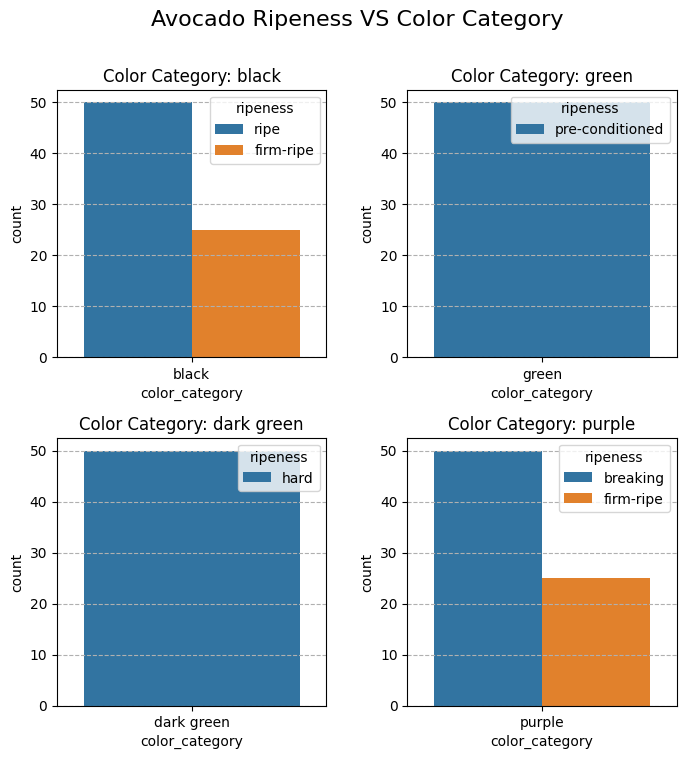

In [8]:
f , ax = plt.subplots(2, 2, figsize=(8, 8),gridspec_kw={'wspace':0.3, 'hspace':0.3})
pos1 = 0
pos2 = 0
f.suptitle("Avocado Ripeness VS Color Category", fontsize=16)
for color in dataset["color_category"].unique():
    sns.countplot(
        data=dataset[dataset["color_category"] == color], 
        x="color_category", 
        hue="ripeness",
        ax=ax[pos1, pos2]
    )
    ax[pos1, pos2].set_title(f"Color Category: {color}")
    ax[pos1, pos2].grid(axis='y', linestyle='--')
    pos2 += 1
    if pos2 > 1:
        pos2 = 0
        pos1 += 1

由 上圖表顯示不同顏色類別的酪梨在各成熟階段的分布情形。

從圖中可以觀察到：
- "black" 對應 "ripe"（成熟）和 "firm-ripe"（熟而結實）階段。
- "dark green" 對應 "hard"（硬的）。
- "green" 對應 "pre-conditioned"（通常指經過處理以加速成熟的）。
- "purple" 對應 "breaking"（初熟）與 "firm-ripe"（已成熟但仍保持硬度）。

這說明酪梨的外觀顏色與其成熟度 具有一定區分能力。



果實重量與體積大小之關聯
---

Text(0.5, 1.0, 'Ripeness vs Size (cm3)')

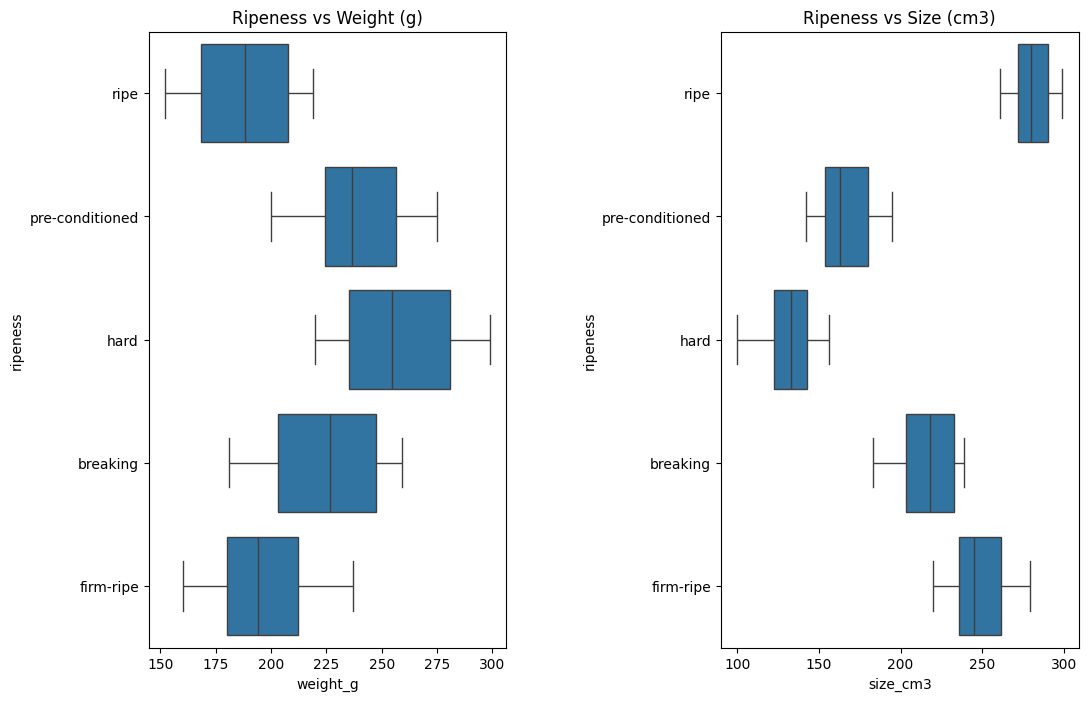

In [9]:
f,ax = plt.subplots(1, 2, figsize=(12, 8) , 
                    gridspec_kw={"wspace":0.6})
sns.boxplot(x='weight_g', y='ripeness',
            data=data_copy, ax=ax[0])
sns.boxplot(x='size_cm3', y='ripeness',
            data=data_copy, ax=ax[1])
ax[0].set_title("Ripeness vs Weight (g)")
ax[1].set_title("Ripeness vs Size (cm3)")
# ax[0].tick_params(axis='x', rotation=45)
# ax[1].tick_params(axis='x', rotation=45)

In [10]:
data_copy.drop(columns=["ripeness" , "color_category"]).corr()["weight_g"]["size_cm3"]    

np.float64(-0.7227615314183107)

<Axes: xlabel='weight_g', ylabel='size_cm3'>

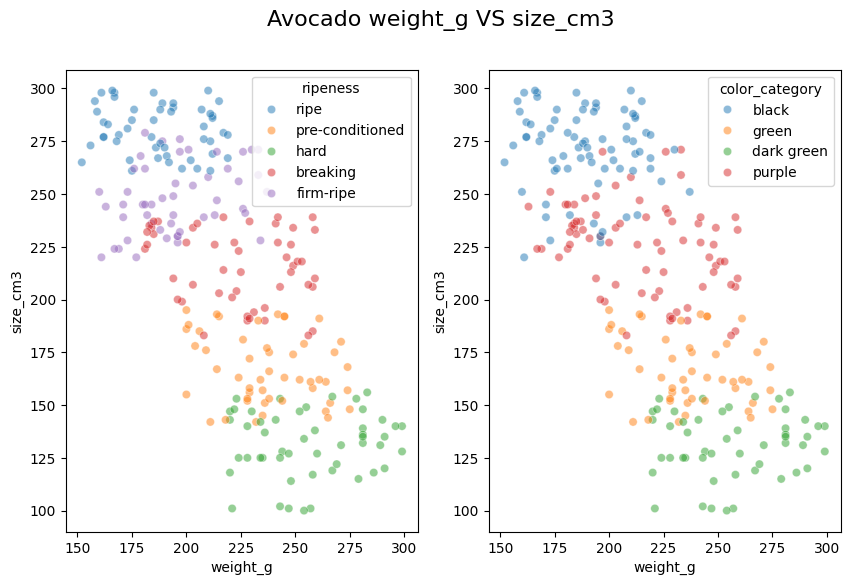

In [11]:
# weight_g	size_cm3 
f, ax = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Avocado weight_g VS size_cm3", fontsize=16)
sns.scatterplot(x='weight_g', y='size_cm3', 
                data=data_copy, 
                hue='ripeness', 
                alpha=0.5,
                ax=ax[0])

sns.scatterplot(x='weight_g', y='size_cm3', 
                data=data_copy, 
                hue='color_category', 
                alpha=0.5,
                ax=ax[1])

由以上boxplot可知，weight_g 與 size_cm3間，兩者為負相關。

Avocado weight_g VS size_cm3圖表 : 

    當酪梨的體積越大時，其重量可能會越輕，並越接近成熟

酪梨成熟度階段 : 
- "ripe"（成熟）
- "firm-ripe"（熟而結實）
- "breaking"（初熟）
- "pre-conditioned"（通常指經過處理以加速成熟的）
- "hard"（硬的）



抗滲透度與成熟階段之關係
---

Text(0.5, 1.0, 'Ripeness vs Firmness')

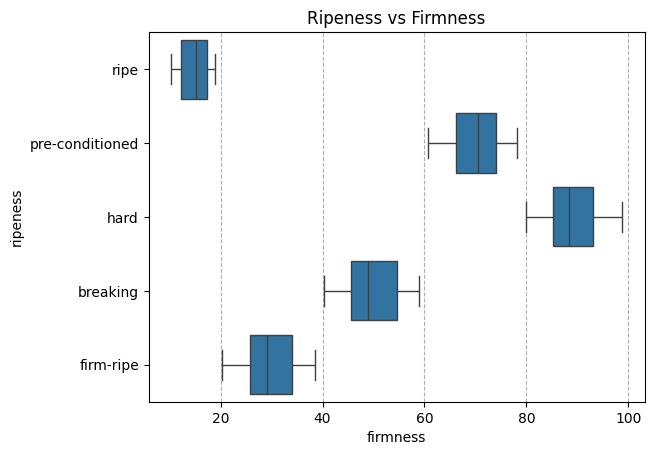

In [12]:
# firmness
sns.boxplot(x='firmness', y='ripeness',
                data=data_copy)
plt.grid(axis="x" , linestyle='--')
plt.title("Ripeness vs Firmness")

由上圖可看出 抗滲透度 對 成熟階段 具有明顯的區分能力

- 可作為判斷成熟度的依據之一。

聲音(db)(麥克風-敲擊測試)與成熟階段之關係
---

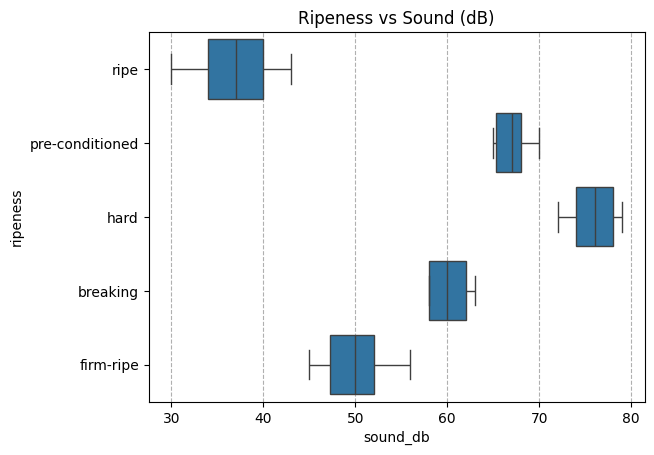

In [13]:
sns.boxplot(x='sound_db', y='ripeness',
                data=data_copy)
plt.title("Ripeness vs Sound (dB)")
plt.grid(axis="x" , linestyle='--')

由上圖可看出 聲音(db)(麥克風-敲擊測試) 對 成熟階段 具有明顯的區分能力

- 可作為判斷成熟度的依據之一。

聲音、抗滲透度、重量與體積之關係
---

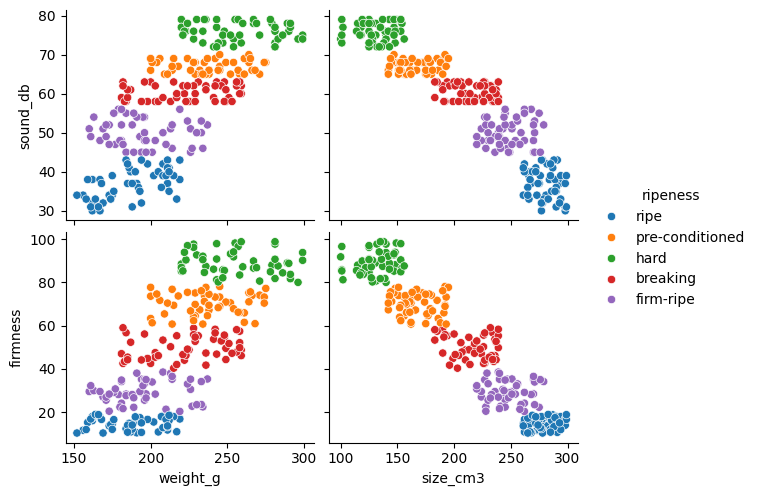

In [14]:
plt.Figure(figsize=(10, 8))
sns.pairplot(
            data=data_copy , 
            x_vars=["weight_g", "size_cm3"],
            y_vars=["sound_db", "firmness"],
            hue="ripeness",
            aspect=1.2
        )


Text(0.5, 1.0, 'Sound (dB) vs Firmness')

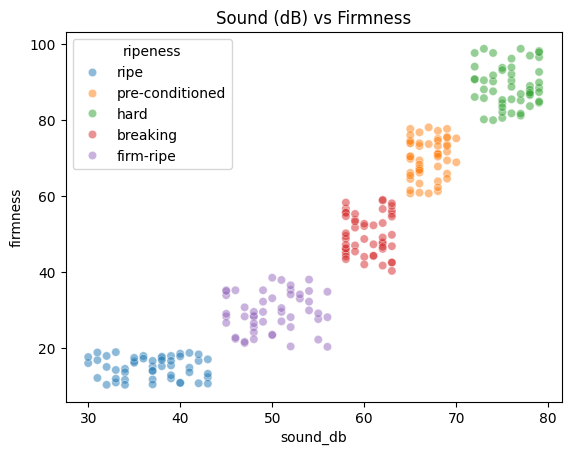

In [15]:
sns.scatterplot(x='sound_db', y='firmness',
                data=data_copy , hue='ripeness',
                alpha=0.5)
plt.title("Sound (dB) vs Firmness")

設定 密度，並檢查密度與成熟階段之關係
---

In [16]:
data_copy["density"] = round(data_copy["weight_g"] / data_copy["size_cm3"] , 2)

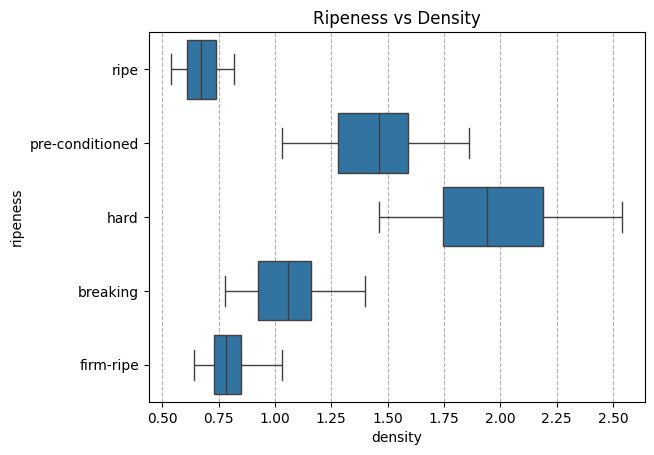

In [17]:
sns.boxplot(x='density', y='ripeness',
                data=data_copy)
plt.title("Ripeness vs Density")
plt.grid(axis="x" , linestyle='--')

檢查 密度搭配 抗滲透度或聲音 對 成熟階段之區分效果
---	

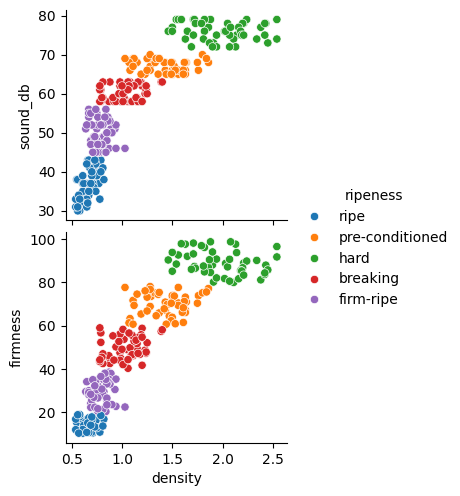

In [18]:
plt.Figure(figsize=(10, 8))
sns.pairplot(
            data=data_copy , 
            x_vars=["density"],
            y_vars=["sound_db", "firmness"],
            hue="ripeness",
            aspect=1.2
        )

# 資料處裡

In [31]:
dataset.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [32]:
dataset["density"] = round(dataset["weight_g"] / dataset["size_cm3"] , 2)

In [33]:
encode_columns = pd.get_dummies(dataset[["color_category"]]).astype(int)
encode_columns

,color_category_black,color_category_dark green,color_category_green,color_category_purple
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
245,0,1,0,0
246,1,0,0,0
247,1,0,0,0
248,0,0,1,0


In [34]:
df = pd.concat([dataset, encode_columns], axis=1)
try:
    df.drop(columns=["color_category"], inplace=True)
except:
    pass
try:
    df.drop(columns=["hue","saturation","brightness"], inplace=True)
except:
    pass
df

,firmness,sound_db,weight_g,size_cm3,ripeness,density,color_category_black,color_category_dark green,color_category_green,color_category_purple
0,14.5,34,175,261,ripe,0.67,1,0,0,0
1,71.7,69,206,185,pre-conditioned,1.11,0,0,1,0
2,88.5,79,220,143,hard,1.54,0,1,0,0
3,93.8,75,299,140,hard,2.14,0,1,0,0
4,42.5,63,200,227,breaking,0.88,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
245,94.1,72,254,134,hard,1.90,0,1,0,0
246,21.6,47,182,240,firm-ripe,0.76,1,0,0,0
247,14.0,37,188,274,ripe,0.69,1,0,0,0
248,61.5,65,261,162,pre-conditioned,1.61,0,0,1,0


In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["weight_g", "size_cm3","ripeness"])
y = df["ripeness"]

X.shape, y.shape

((250, 7), (250,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 7), (50, 7), (200,), (50,))

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

svc_params = {
    "C": [*np.arange(0.1, 10.1, 0.5)],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
rf_params = {
    "criterion": ["gini", "entropy" , "log_loss"],
    "n_estimators": [*range(50,250, 50)],
}

scale = StandardScaler()
scale.fit(X_train.iloc[:, :-4])
X_train_scaled = np.concatenate([scale.transform(X_train.iloc[:, :-4]), X_train.iloc[:, -4:]], axis=1)
X_test_scaled = np.concatenate([scale.transform(X_test.iloc[:, :-4]), X_test.iloc[:, -4:]], axis=1)

In [39]:
GS_svc = GridSearchCV(
    SVC(),
    svc_params,
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

GS_rf = GridSearchCV(
    RandomForestClassifier(),
    rf_params,
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
GS_svc.fit(X_train_scaled, y_train)
print("Best parameters for SVC:", GS_svc.best_params_)
print("Best score for SVC:", GS_svc.best_score_)
print("5 fold cross-validation score for SVC:",
      cross_val_score(GS_svc.best_estimator_, X_train_scaled, y_train, cv=5))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for SVC: {'C': np.float64(0.1), 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVC: 1.0
5 fold cross-validation score for SVC: [1. 1. 1. 1. 1.]


In [42]:
GS_rf.fit(X_train, y_train)
print("Best parameters for RF:", GS_rf.best_params_)
print("Best score for RF:", GS_rf.best_score_)
print("5 fold cross-validation score for RF:",
      cross_val_score(GS_rf.best_estimator_, X_train, y_train, cv=5))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for RF: {'criterion': 'gini', 'n_estimators': 50}
Best score for RF: 1.0
5 fold cross-validation score for RF: [1. 1. 1. 1. 1.]


                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        13
      firm-ripe       1.00      1.00      1.00         9
           hard       1.00      1.00      1.00         8
pre-conditioned       1.00      1.00      1.00         7
           ripe       1.00      1.00      1.00        13

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



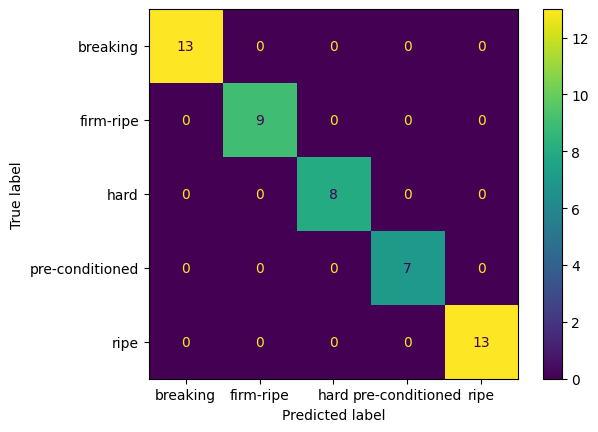

In [43]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
y_pred = GS_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(GS_svc, X_test_scaled, y_test)

                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        13
      firm-ripe       1.00      1.00      1.00         9
           hard       1.00      1.00      1.00         8
pre-conditioned       1.00      1.00      1.00         7
           ripe       1.00      1.00      1.00        13

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



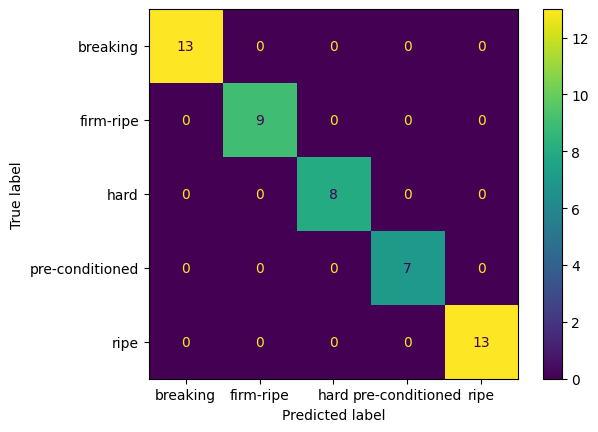

In [44]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
y_pred = GS_rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(GS_rf, X_test, y_test)

Best parameters for SVC: {'C': np.float64(0.1), 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVC: 1.0
Best parameters for RF: {'criterion': 'gini', 'n_estimators': 50}
Best score for RF: 1.0

# 結論
- 樣本數 : 250 
- 選擇RandomForestClassifier : 可省略標準化階段 √